In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/content/drive/MyDrive/analisa-teknikal-saham/UNVR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-21,27.020000,27.410000,26.920000,27.200001,27.200001,1169000
1,2021-05-24,27.299999,27.420000,27.049999,27.280001,27.280001,1051500
2,2021-05-25,27.420000,27.510000,26.990000,27.160000,27.160000,1279800
3,2021-05-26,27.160000,27.309999,26.860001,27.000000,27.000000,1526600
4,2021-05-27,27.260000,27.459999,26.980000,27.059999,27.059999,1122200
...,...,...,...,...,...,...,...
248,2022-05-16,28.360001,28.830000,27.990000,28.090000,28.090000,1012300
249,2022-05-17,28.740000,29.184999,28.610001,29.030001,29.030001,1835600
250,2022-05-18,28.750000,29.375000,28.215000,28.340000,28.340000,875500
251,2022-05-19,27.940001,28.799999,27.850000,28.490000,28.490000,1049200


In [3]:
import math
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [4]:
#Scale the all of the data to be values between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [5]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [6]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
#Build the LSTM network model
from keras.models import Sequential
from keras.layers import LSTM
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [9]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
143/143 [==============================] - 5s 36ms/step - loss: 0.0038
Epoch 2/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0040
Epoch 3/100
143/143 [==============================] - 4s 26ms/step - loss: 0.0037
Epoch 4/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0032
Epoch 5/100
143/143 [==============================] - 4s 28ms/step - loss: 0.0030
Epoch 6/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0034
Epoch 7/100
143/143 [==============================] - 4s 28ms/step - loss: 0.0028
Epoch 8/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0026
Epoch 9/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0026
Epoch 10/100
143/143 [==============================] - 4s 28ms/step - loss: 0.0031
Epoch 11/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0030
Epoch 12/100
143/143 [==============================] - 4s 27ms/step - loss: 0.0027
E

In [22]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [23]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [24]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [25]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [26]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.9868482956003172

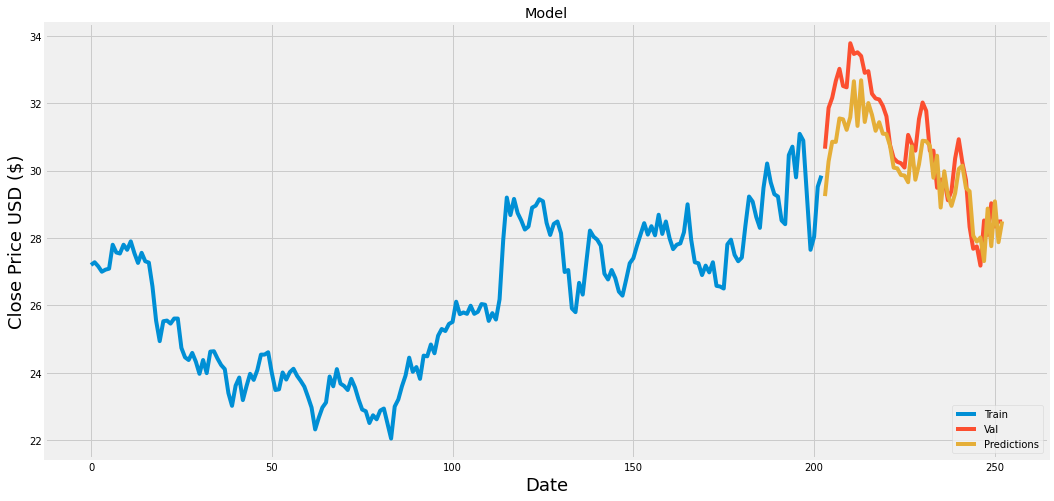

In [27]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Get the quote
sapx_quote = df
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)